# Pandas Series

## 파이썬 리스트, 튜플, 딕셔너리

In [1]:
mystock = ['kakao', 'naver', 'daum', 'google', 'melon']
print(mystock[0])
print(mystock[1])

kakao
naver


In [2]:
# 변수는 규칙성이 없으므로 반복문을 사용하기 어렵지만, 리스트를 이용하면 반복문을 통해 각 데이터에 접근 가능

for stock in mystock:
    print(stock)
    
## 리스트의 장점
# 1. 반복문 사용 가능
# 2. 다양한 메서드 제공 (ex) insert, append, index, etc)

## 튜플의 특징
# 수정 불가능
# 리스트에 비해 빠른 속도

kakao
naver
daum
google
melon


In [4]:
## 딕셔너리
# 키(key) - 값(value)이라는 쌍으로 데이터를 저장하여 키를 가지고 빠르게 값을 찾을 수 있는 자료구조

exam_dic = {"key1" : "room1", "key2" : "room2"}
print(exam_dic["key1"])
print(exam_dic["key2"])

# value로는 key를 바로는 찾을 수가 없다.

room1
room2


In [19]:
## 카카오의 5일간 종가 데이터
# 날짜 : 2016-02-19     2016-02-18     2016-02-17     2016-02-16     2016-02-15
# 종가 : 92600          92400          92100          94300          92300

kakao_daily_ending_prices = {'2016-02-19':92600,
                             '2016-02-18':92400,
                             '2016-02-17':92100,
                             '2016-02-16':94300,
                             '2016-02-15':92300}

for price in kakao_daily_ending_prices.values():
    print(price)

print('\n')
    
for date in kakao_daily_ending_prices.keys():
    print(date)
    
    
## 이처럼 딕셔너리를 통해 쉽게 '키-값 쌍'구조를 가진 데이터를 저장할 수 있다.

92600
92400
92100
94300
92300


2016-02-19
2016-02-18
2016-02-17
2016-02-16
2016-02-15


## Series 기초

pandas에는 Series와 DataFrame이라는 두 종류의 자료구조가 존재한다.

### pandas를 쓰는 이유
- 자동적/명시적으로 축의 이름에 따라 데이터를 정렬할 수 있는 데이터 구조.
- 잘못 정렬된 데이터에 의한 오류를 방지하고, 다양한 방식으로 색인된 데이터를 다룰 수 있는 기능
- 통합된 시계열 기능
- 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
- 산술연산과 한 축의 모든 값을 더하는 등 데이터 축약연산은 축의 이름 같은 메타데이터로 전달될 수 있어야함
- 누락된 데이터를 유연하게 처리할 수 있는 기능
- SQL 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능

In [20]:
from pandas import Series, DataFrame

In [21]:
import pandas
print(pandas, Series)

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'> <class 'pandas.core.series.Series'>


In [22]:
kakao = Series([92600, 92400, 92100, 94300, 92300])
print(kakao)

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64


In [24]:
# 위에서 보면 Series 객체는 일차원 배열과 달리 값뿐만 아니라 각 값에 연결된 인덱스 값도 동시에 저장한다.
# Index : 0~4
# value : 92600 ~ 92300

In [25]:
# Series는 파이썬 리스트와는 달리 인덱싱 값을 지정할 수 있다.

kakao2 = Series([92600, 92400, 92100, 94300, 92300], index = ['2016-02-19',
                                                             '2016-02-18',
                                                             '2016-02-17',
                                                             '2016-02-16',
                                                             '2016-02-15'])
print(kakao2)

2016-02-19    92600
2016-02-18    92400
2016-02-17    92100
2016-02-16    94300
2016-02-15    92300
dtype: int64


In [26]:
print(kakao2['2016-02-19'])
print(kakao2['2016-02-18'])

# 각 날짜에 대한 종가가 정상적으로 출력됨을 확인할 수 있다.

92600
92400


In [27]:
## Series 객체의 index와 values라는 이름의 속성을 통해서도 접근 가능
## Series는 딕셔너리와 다르게 key대신에 index를 사용한다.

for date in kakao2.index:
    print(date)

for ending_price in kakao2.values:
    print(ending_price)

2016-02-19
2016-02-18
2016-02-17
2016-02-16
2016-02-15
92600
92400
92100
94300
92300


In [28]:
# Series 객체의 덧셈 연산
# 나의 가정 : 네이버, SK, KT에 대해 10, 20, 30주의 주식을 보유
# 친구의 가정 : KT, 네이버, SK에 대해 10, 30, 20주의 주식을 보유

from pandas import Series, DataFrame

mine  =  Series([10, 20, 30], index = ['naver', 'SK', 'KT'])
friend = Series([10, 30, 20], index = ['KT', 'naver', 'SK'])

In [29]:
print(mine)

naver    10
SK       20
KT       30
dtype: int64


In [30]:
print(friend)

KT       10
naver    30
SK       20
dtype: int64


In [31]:
# 덧셈 연산

merge = mine + friend
print(merge)

KT       40
SK       40
naver    40
dtype: int64


## DataFrame 생성

In [34]:
raw_data = {'col0':[1,2,3,4],
           'col1':[10,20,30,40],
           'col2':[100,200,300,400]}
print(raw_data)

{'col0': [1, 2, 3, 4], 'col1': [10, 20, 30, 40], 'col2': [100, 200, 300, 400]}


In [35]:
# DataFrame 객체를 생성하는 가장 쉬운 방법 = 파이썬의 딕셔너리 사용
# 딕셔너리를 통해 각 칼럼에 대한 데이터를 저장한 후 딕셔너리를 DataFrame 클래스의 생성자 인자로 넘겨주면 DataFrame 객체가 생성됨

from pandas import Series, DataFrame

raw_data = {'col0':[1,2,3,4],
           'col1':[10,20,30,40],
           'col2':[100,200,300,400]}

data = DataFrame(raw_data)
print(data)

   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400


In [36]:
# 파이썬 딕셔너리에서 키를 통해 값에 접근했던 것과 같이 DataFrame 객체의 각 칼럼에 접근할 수 있다.

data['col0']

0    1
1    2
2    3
3    4
Name: col0, dtype: int64

In [37]:
data['col1']

0    10
1    20
2    30
3    40
Name: col1, dtype: int64

In [38]:
data['col2']

0    100
1    200
2    300
3    400
Name: col2, dtype: int64

In [39]:
type(data['col0'])

# DataFrame에 있는 각 칼럼은 Series 객체임을 알 수 있다.
# 즉, DataFrame을 인덱스가 같은 여러개의 Series 객체로 구성된 자료구조로 생각해도 좋다.

pandas.core.series.Series

In [40]:
# DataFrame 객체의 내부 구조

#           |    Series('col0')  |  Series('col1')  |  Series('col2')
#-----------|--------------------|------------------|-----------------
#  Index    |      Value         |    Value         |    Value
#-----------|--------------------|------------------|-----------------
#    0      |        1           |      10          |     100
#-----------|--------------------|------------------|-----------------
#    1      |        2           |      20          |     200
#-----------|--------------------|------------------|-----------------
#    2      |        3           |      30          |     300
#-----------|--------------------|------------------|-----------------
#    3      |        4           |      40          |     400

In [41]:
# 16.02.23~16.02.29일 사이의 일자별 주가 중 시가, 고가, 저가, 종가의 데이터
# 딕셔너리를 이용한 DataFrame 객체 생성

daeshin = {'open' : [11650, 11100, 11200, 11100, 11000],
           'high' : [12100, 11800, 11200, 11100, 11150],
           'low'  : [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

daeshin_day = DataFrame(daeshin)
print(daeshin_day)

    open   high    low  close
0  11650  12100  11600  11900
1  11100  11800  11050  11600
2  11200  11200  10900  11000
3  11100  11100  10950  11100
4  11000  11150  10900  11050


In [42]:
# column의 순서는 DataFrame 객체를 생성할 때 columns라는 키워드로 지정 가능

daeshin_day = DataFrame(daeshin, columns = ['close', 'low', 'high', 'open'])
print(daeshin_day)

   close    low   high   open
0  11900  11600  12100  11650
1  11600  11050  11800  11100
2  11000  10900  11200  11200
3  11100  10950  11100  11100
4  11050  10900  11150  11000


In [43]:
# index 역시 DataFrame 객체를 생성하는 시점에서 지정 가능

data = ['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23']
daeshin_day = DataFrame(daeshin, columns = ['open', 'high', 'low', 'close'], index = data)
print(daeshin_day)

           open   high    low  close
16.02.29  11650  12100  11600  11900
16.02.26  11100  11800  11050  11600
16.02.25  11200  11200  10900  11000
16.02.24  11100  11100  10950  11100
16.02.23  11000  11150  10900  11050


## DataFrame 칼럼, 로우 선택

In [44]:
# 종가(close)에 대한 데이터만 추출하는 방법

close = daeshin_day['close']
print(close)

16.02.29    11900
16.02.26    11600
16.02.25    11000
16.02.24    11100
16.02.23    11050
Name: close, dtype: int64


In [45]:
# but, index를 사용해서는 이 방식을 통해 추출 불가능하다.
# 즉, DataFrame 객체의 row에 접근하려면 ix 메서드를 사용해 인덱스 값을 넘겨주면 된다.

day_data = daeshin_day.ix['16.02.24']
print(day_data)
print(type(day_data))

open     11100
high     11100
low      10950
close    11100
Name: 16.02.24, dtype: int64
<class 'pandas.core.series.Series'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [46]:
print(daeshin_day.columns)
print(daeshin_day.index)

Index(['open', 'high', 'low', 'close'], dtype='object')
Index(['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23'], dtype='object')


## DataReader 사용하기

In [49]:
import pandas_datareader.data as web

In [50]:
import datetime

In [ ]:
# datetime 모듈을 이용해 조회 시작 날짜인 2016-02-19와 조회 종료일인 2016-03-04에 해당하는 변수 생성

In [30]:
start = datetime.datetime(2016, 2, 19)

In [31]:
end = datetime.datetime(2016, 3, 4)

In [41]:
# 조회할 시작일과 종료일을 설정했으니 조회할 종목인 GS의 종목코드 '078930'을 입력
# DataReader함수의 첫 번째 인자는 조회할 종목에 대한 정보, 두 번째는 데이터를 가져올 소스에 대한 정보(ex)야후)
# 세 번째와 네 번째 인자는 조회 기간의 시작일과 종료일이다.
# DataReader 함수는 DataFrame 객체를 반환한다.
# 종목코드는 한국 거래소에서 얻을 수 있으며 KS는 코스피, KQ는 코스닥이다.


gs = web.DataReader("078930.KS", "yahoo", start, end)

In [42]:
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,51100.0,49950.0,50300.0,50600.0,301800.0,45921.683594
2016-02-22,50800.0,49850.0,50300.0,50400.0,153961.0,45740.175781
2016-02-23,53000.0,50800.0,50800.0,52800.0,431934.0,47918.273438
2016-02-24,53500.0,51900.0,52000.0,53500.0,259616.0,48553.554688
2016-02-25,54700.0,52700.0,53900.0,53900.0,170839.0,48916.574219
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,48372.046875
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188


In [43]:
samsung = web.DataReader("005930.KS", "yahoo", start, end)

In [44]:
samsung

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,23900.0,23480.0,23740.0,23800.0,8842600.0,1143.218872
2016-02-22,23840.0,23320.0,23800.0,23500.0,8744950.0,1128.808350
2016-02-23,23780.0,23460.0,23580.0,23620.0,7383700.0,1134.572632
2016-02-24,23580.0,23220.0,23560.0,23440.0,7024200.0,1125.926514
2016-02-25,23740.0,23440.0,23440.0,23580.0,6681750.0,1132.651245
2016-02-26,23740.0,23440.0,23600.0,23440.0,8867200.0,1125.926514
2016-02-29,23880.0,23520.0,23580.0,23560.0,14434000.0,1131.690430
2016-03-02,24140.0,23920.0,24000.0,23940.0,11818600.0,1149.943604
2016-03-03,24400.0,24040.0,24260.0,24400.0,10949550.0,1172.039429


## 차트 그리기

In [45]:
# 총 10개의 엔트리가 존재함을 알 수 있다.

gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-02-19 to 2016-03-04
Data columns (total 6 columns):
High         10 non-null float64
Low          10 non-null float64
Open         10 non-null float64
Close        10 non-null float64
Volume       10 non-null float64
Adj Close    10 non-null float64
dtypes: float64(6)
memory usage: 560.0 bytes


In [53]:
# 시작일과 종료일을 기입하지 않으면 2010-01-01부터 데이터를 조회한 날까지의 데이터를 얻어온다.
# 총 1529개의 엔트리가 존재함을 확인할 수 있다.

gs2 = web.DataReader("078930.KS", "yahoo")

In [55]:
gs2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1529 entries, 2010-01-04 to 2016-03-04
Data columns (total 6 columns):
High         1529 non-null float64
Low          1529 non-null float64
Open         1529 non-null float64
Close        1529 non-null float64
Volume       1529 non-null float64
Adj Close    1529 non-null float64
dtypes: float64(6)
memory usage: 83.6 KB


In [56]:
# matplotlib 패키지를 사용하여 그래프를 그릴 수 있다.
# 특히, 그래프는 matplotlib패키지의 pyplot이라는 모듈을 사용한다.

import matplotlib.pyplot as plt

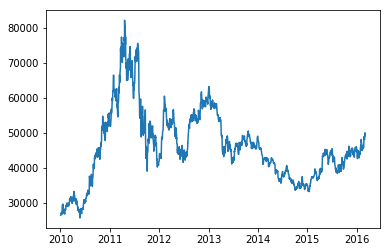

In [59]:
# pyplot 모듈에서 plot 함수를 호출한다.
# 이 때, 그래프로 표현하려는 데이터를 인자로 전달하면 된다.
# DataFrame에서 'Adj Close'라는 칼럼데이터를 넘겨준다.

plt.plot(gs2['Adj Close'])

In [61]:
## 새 창이 나타나면서 그래프 출력시키는 방법
plt.show()

In [63]:
# 이때 y축에 수정 종가가 표시되었으며, x축에 날짜가 아닌 정수 인덱스가 출력된 것을 확인 할 수 있다.
# 즉, 수정해보면

gs2.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
               '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-02',
               '2016-03-03', '2016-03-04'],
              dtype='datetime64[ns]', name='Date', length=1529, freq=None)

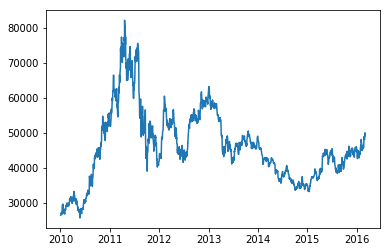

In [66]:
plt.plot(gs2.index, gs2['Adj Close'])

# x축에 날짜가 잘 출력된 것을 확인 할 수 있다.

## 이동평균선 구해보기

이동평균선은 사전적 의미로 '일정 기간 동안 주가를 산술 평균한 값인 주가이동평균을 차례로 연결해 만든 선' 임을 알 수 있다.

## Pandas를 이용한 주가이동평균 계산

In [67]:
import pandas as pd

In [68]:
import pandas_datareader.data as web

In [69]:
gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2016-03-06")

In [75]:
# R과 동일하게 tail함수는 뒤에서 기본적으로 5개의 데이터를 확인시켜줍니다.
# ()안에 적는 숫자만큼 보여줄 수 있습니다.

gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,49188.835938
2016-03-07,55000.0,54100.0,54800.0,54600.0,160449.0,49551.851562


In [77]:
# 수정 종가에 대해 5일 주가 이동평균을 계산하기 위한 코드(5일간의 이동평균 값이기 때문에 window = 5로 지정한다.)

ma5 = gs['Adj Close'].rolling(window=5).mean()

In [78]:
type(ma5)
# ma5의 객체의 타입이 pandas의 Series임을 확인할 수 있다.

pandas.core.series.Series

In [83]:
ma5.tail(10)

# 주말을 제외하고 3-1은 삼일절로 공휴일이기 때문에 주식시장이 열리지 않았음을 알 수 있다.

Date
2016-02-22    45921.682813
2016-02-23    46339.152344
2016-02-24    46865.526563
2016-02-25    47410.052344
2016-02-26    47900.125000
2016-02-29    48372.046875
2016-03-02    48789.517188
2016-03-03    49061.779687
2016-03-04    49116.232031
2016-03-07    49352.192969
Name: Adj Close, dtype: float64

In [87]:
gs2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,48372.046875
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,49188.835938


In [89]:
# gs['Volume'] != 0
# 위의 코드를 통해서 Volume 즉, 거래량이 0인 날이 존재 하는지의 유무를 확인 할 수 있다.
# 이 코드를 활용해서 이 조건을 만족하는 데이터만 쉽게 뽑아낼 수 있다.

new_gs = gs[gs['Volume'] != 0]

In [90]:
new_gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,49188.835938
2016-03-07,55000.0,54100.0,54800.0,54600.0,160449.0,49551.851562


In [91]:
# 공휴일 데이터가 제거된 DataFrame 객체가 준비됐으니 다시 5일 이동평균 값을 계산해보자

ma5 = new_gs['Adj Close'].rolling(window=5).mean()

In [92]:
ma5.tail(10)

Date
2016-02-22    45921.682813
2016-02-23    46339.152344
2016-02-24    46865.526563
2016-02-25    47410.052344
2016-02-26    47900.125000
2016-02-29    48372.046875
2016-03-02    48789.517188
2016-03-03    49061.779687
2016-03-04    49116.232031
2016-03-07    49352.192969
Name: Adj Close, dtype: float64

In [93]:
# 계산된 5일 주가이동평균 값을 좀 더 쉽게 관리하기 위해 DataFrame 객체의 새로운 칼럼으로 추가해보자.
# insert 메서드를 사용(첫 번째 인자 : 칼럼이 추가될 위치, 두 번째 인자 : 칼럼의 이름, 세 번째 인자 : 추가할 데이터)

new_gs.insert(len(new_gs.columns), "MA5", ma5)
new_gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156,48372.046875
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000,48789.517188
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188,49061.779687
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,49188.835938,49116.232031
2016-03-07,55000.0,54100.0,54800.0,54600.0,160449.0,49551.851562,49352.192969


20, 60, 120일 이동평균 값을 구하기 위해서는 window = 20, window = 60, window = 120으로 각각 잡으면 구할 수 있다.

In [98]:
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()
new_gs.insert(len(new_gs.columns), "MA20", ma20)
new_gs.insert(len(new_gs.columns), "MA60", ma60)
new_gs.insert(len(new_gs.columns), "MA120", ma120)

In [94]:
import matplotlib.pyplot as plt

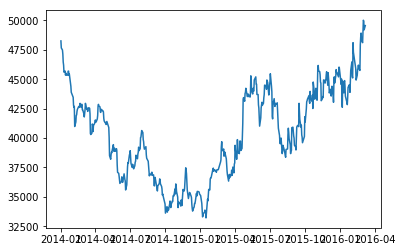

In [95]:
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')

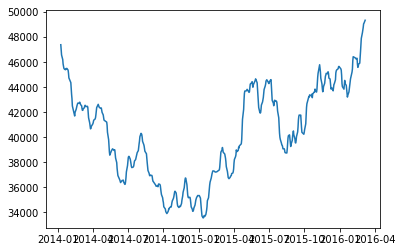

In [96]:
plt.plot(new_gs.index, new_gs['MA5'], label = 'MA5')

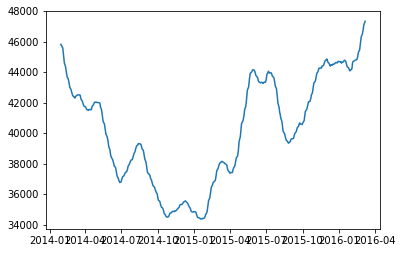

In [99]:
plt.plot(new_gs.index, new_gs['MA20'], label="MA20")

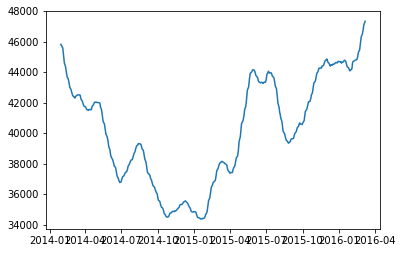

In [100]:
plt.plot(new_gs.index, new_gs['MA20'], label="MA60")

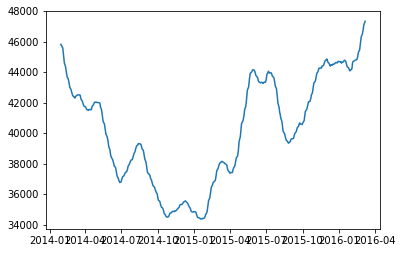

In [101]:
plt.plot(new_gs.index, new_gs['MA20'], label="MA120")

## 주가이동평균선 그리기

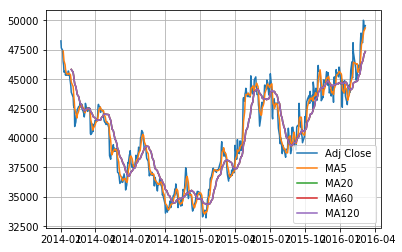

In [104]:
# 범례를 표시하기 이해 legend함수를 호출
# 이때 loc 인자를 통해 범례 표시 위치를 지정 가능 (가장 적절한 위치에 자동 출력되게 하귀 위해 loc = 'best' 옵션을 사용)
# 그래프의 값을 좀 더 편리하게 확인하기 위해 격자(grid)를 표시하려면 grid함수를 호출하면 된다.

plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
plt.plot(new_gs.index, new_gs['MA5'], label = 'MA5')
plt.plot(new_gs.index, new_gs['MA20'], label="MA20")
plt.plot(new_gs.index, new_gs['MA20'], label="MA60")
plt.plot(new_gs.index, new_gs['MA20'], label="MA120")

plt.legend(loc="best")
plt.grid()
plt.show()

# matplotlib를 이용한 데이터 시각화 (revision)

## 간단한 그래프 그리기

In [107]:
import matplotlib.pyplot as plt

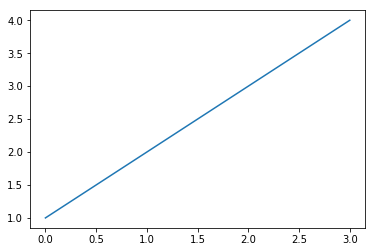

In [110]:
plt.plot([1,2,3,4])
plt.show()

# y축 값 1,2,3,4를 지나는 직선이 그려진 것을 확인할 수 있다.
# ※ plot함수를 호출할 때, x축 값을 따로 지정하지 않으면 자동으로 실숫값이 할당된다. 

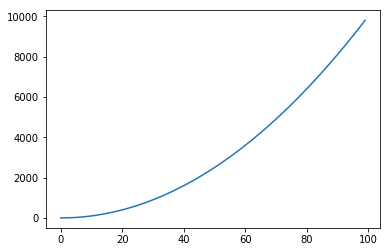

In [111]:
# y = x^2 그래프를 다음과 같이 표현할 수 있다.
# '리스트 내장' 방법을 통하여 y를 구한것이다.

x = range(0, 100)
y = [v*v for v in x]
plt.plot(x,y)

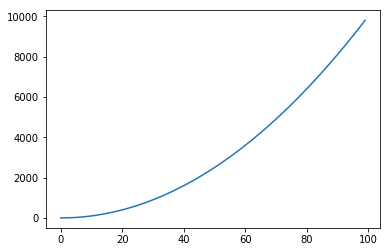

In [115]:
# 리스트 내장이 아닌 for문을 통해서도 구할 수 있으나 코드가 길어진다는 단점이 있다.

x = range(0,100)
y = []
for v in x:
    y.append(v*v)
plt.plot(x,y)

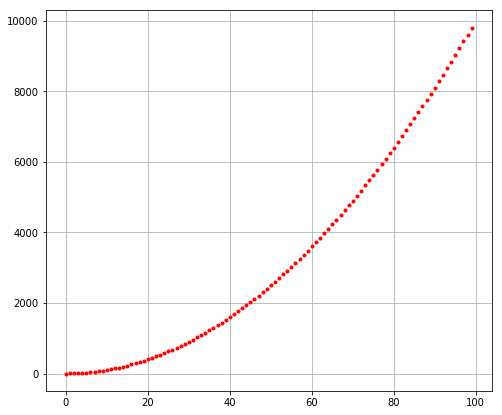

In [157]:
# 위의 파란색 직선의 스타일이 'b-'이고
# 빨간색 원을 그리고 싶으면 'ro'를 사용하면 된다. ('r'은 red를 의미하고, 'o'는 그래프의 마커 모양을 의미한다.)
x = range(0,100)
y = [v*v for v in x]
plt.plot(x,y,'r.')

### matplotlib의 주요 색상
b : blue(파란색)
g : green(녹색)
r : red(빨간색)
r : cyan(청록색)
m : magenta(마젠타색)
y : yellow(노란색)
k : black(검은색)
w : white(흰색)

### matplotlib의 주요 마커
o : circle(원)
v : triangle_down(역 삼각형)
^ : triangle_up(삼각형)
s : square(네모)
+ : plus(플러스)
. : point(점)

## Figure와 subplots

### 한 화면에 여러 개의 그래프 그리기

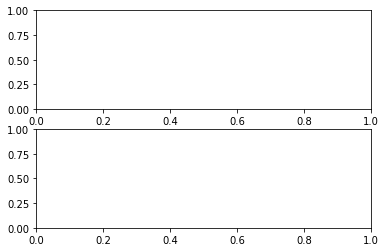

In [127]:
# 가장 먼저 figure함수를 통해 Figure 객체를 먼저 만든 후 
# add_subplot 메서드를 통해 그리려는 그래프 개수만큼 subplot을 만들면 된다.
# subplot의 개수는 add_subplot 메서드의 인자를 통해 조정할 수 있다.

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

# 위의 코드에서 (2,1,1)은 2 x 1 의 subplot을 생성하며 세 번째 인자 1은 생성된 두 개의 subplot 중 첫 번째 subplot을 의미
# (2,1,2)는 2 x 1의 subplot에서 두 번째 subplot을 의미한다.

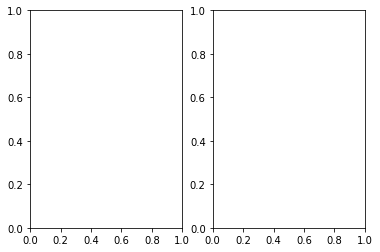

In [133]:
# add_subplot 메서드의 인자를 변경해 1 x 2 형태의 subplot을 만들어 보자.

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

아직까지 생성된 subplot에 그래프를 그리지 않았기 때문에 아무것도 출력되지는 않았다.


※ 참고로 add_subplot 메서드를 호출하면 AxesSubplot 객체가 생성된다.
   위 코드에서는 ax1, ax2라는 변수를 통해 생성된 객체를 바인당했으며,

Axes를 하나의 subplot과 유사한 개념으로 이해하면 된다.

In [134]:
# 그래프를 그리는 코드
# bar함수 : 막대그래프

import matplotlib.pyplot as plt

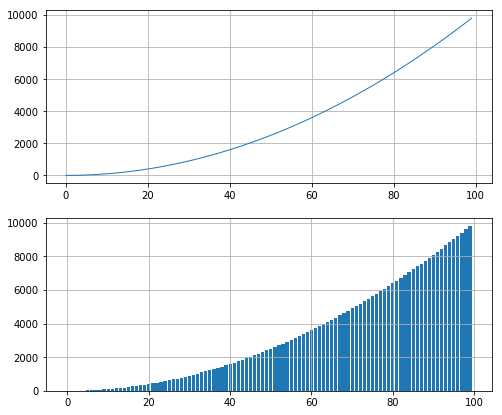

In [158]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

x = range(0,100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)
plt.show()

In [159]:
## sin과 cos 그래프 그리기
# 범위(0 ~ 2π)에서의 x에 대해 y = sin(x)와 y = cos(x)를 그려보자.
# x값이 실수 범위이기 때문에 range를 사용할 수 없고, numpy모듈의 arange를 사용한다.
# 0.0 ~ 2π 사이에서 0.1 간격으로 x값을 만들어보자

import numpy as np

In [160]:
# x값을 살펴보면 다음과 같이 0.1씩 증가하는 것을 확인할 수 있다.

x = np.arange(0.0, 2*np.pi, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

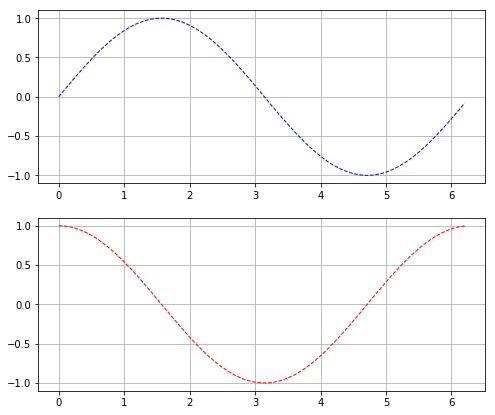

In [161]:
## sin과 cos 그래프 그리는 전체 코드
# 앞서 설명한 것처럼 두 개의 subplot을 추가하기 위해 add_subplot 메서드를 사용
# sin 그래프는 'b--'을 사용해 파란색의 대시라인 마커로 표현했고,
# cos 그래프는 'r--'를 사용해 빨간색의 대시라인 마커로 표현했다.

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 2*np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

plt.show()

## 라벨 및 범례 표시하기

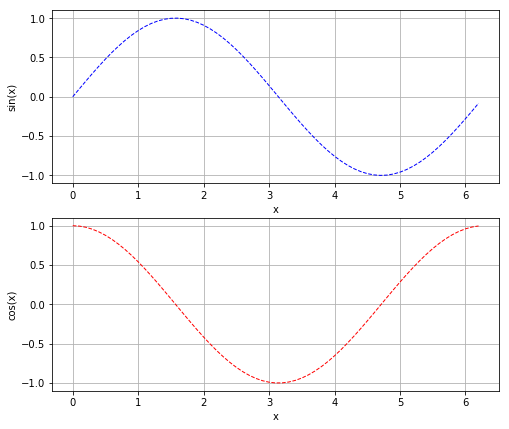

In [162]:
## 그래프를 그릴 때 가장 주의해야 할 점은 그래프의 x축과 y축의 값이 어떤 데이터인지를 표시하는 것이다.
# 그래서 라벨을 추가하는 것이다.
# 두 개의 subplot이 있으므로 각 subplot에 대해 x축과 y축 라벨을 설정해야 한다.
# subplot은 앞서 설명한 것처럼 Axes객체이다.
# Axes 객체는 set_xlabel과 set_ylabel 메서드를 통해 x축과 y축에 라벨을 설정할 수 있다.

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 2*np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')

ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')

plt.show()

In [163]:
## 차트 크기 조절하는 함수 (가로, 세로) 인치 단위
plt.rcParams["figure.figsize"] = (8,7)

# 선의 두께 조절 함수
plt.rcParams['lines.linewidth'] = 1

# 선의 색깔 조절 함수
plt.rcParams['lines.color'] = 'b'

# 차트 내 격자선 표시 여부
plt.rcParams['axes.grid'] = True 

In [164]:
## LG전자와 삼성전자의 주가에 대한 그래프를 한곳에서 확인 (with 범례)
# 먼저 LG전자와 삼성전자의 수정 종가 데이터가 필요(pandas_datareader 모듈의 DataReader 함수 사용)

import pandas_datareader.data as web

In [165]:
lg = web.DataReader("066570.KS", "yahoo")
samsung = web.DataReader("005930.KS", "yahoo")

# 둘 다 DataFrame 객체를 바인딩하고 있으며 'Adj Close'라는 칼럼에 수정 종가 데이터가 저장되어 있다.

In [166]:
import matplotlib.pyplot as plt

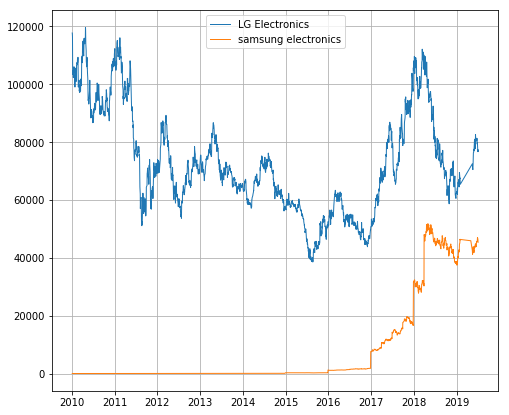

In [181]:
plt.plot(lg.index, lg['Adj Close'], label = "LG Electronics")
plt.plot(samsung.index, samsung["Adj Close"], label = "samsung electronics")

# legend 함수를 통하여 범례 추가
plt.legend(loc = 9) # plt.legend(loc = 'upper center')
plt.show()

# legend 위치
# best(0) - upper right(1) - upper left(2) - lower left(3) - lower right(4) - right(5)
# center left(6) - center right(7) - lower center(8) - upper center(9) - center(10)

## matplotlib 구성

In [211]:
# 그래프를 그리면 Figure 객체와 하나 이상의 subplot(Axes) 객체가 필요합니다.
# Axes 객체는 다시 두 개의 Axis 객체를 포함하고 Axis 객체는 y축과 x축을 나타낸다.
# 즉, 그래프를 그리려면 아래의 코드처럼 figure함수를 사용해 Figure 객체를 생성해야 한다.

import matplotlib.pyplot as plt

In [212]:
fig = plt.figure()

<Figure size 576x504 with 0 Axes>

In [213]:
type(fig)

matplotlib.figure.Figure

matplotlib.axes._subplots.AxesSubplot

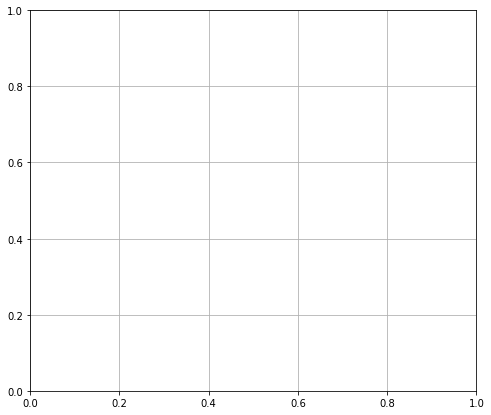

In [214]:
# 빈 Figure 객체에 Axes 객체 (또는 subplot)를 생성하려면 add_subplot 메서드를 사용하면 된다.
# add_subplot(1,1,1)은 Figure 객체에 하나의 AxesSubplot 객체를 생성한다.

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

type(ax)

# ax의 타입이 AxesSubplot임을 알 수 있다.
# 이번에는 Figure 객체에 AxesSubplot(x축, y축) 객체가 생성된 것을 확인할 수 있다.

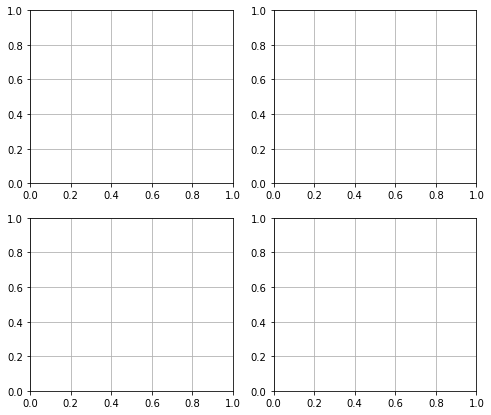

In [215]:
# Figure 객체를 생성하고 해당 Figure 객체에 여러 개의 AxesSubplot 객체를 생성하는 두 가지 작업을 한번에 하고자 할 때는
# plt.subplots를 사용하면 된다.
# plt.subplots(2,2)가 호출되면 Figure 객체와 2 x 2 그리드 형태의 AxesSubplot 객체가 생성된다.

fig, ax_list = plt.subplots(2,2)

In [216]:
ax_list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5968DAC88>,
      dtype=object)

In [217]:
# 2 x 2 구조의 AxesSubplot 객체에 접근하려면 ax_list[0][0], ax_list[0][1], ax_list[1][0], ax_list[1][1]을
# 통해 각 행과 열의 위치에 존재하는 AxesSubplot 객체에 접근할 수 있다.

ax_list[0][0]

In [218]:
ax_list[0][1]

In [219]:
ax_list[1][0]

In [220]:
ax_list[1][1]

In [225]:
# ax_list[0][0]이 바인딩하고 있는 왼쪽 상단의 AxesSubplot 객체에 그래프를 그려보자

ax_list[0][0].plot([1,2,3,4])
plt.show()

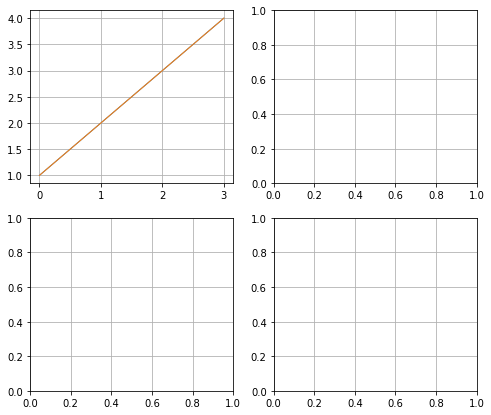

In [223]:
fig

## 수정 종가와 거래량 한번에 그리기

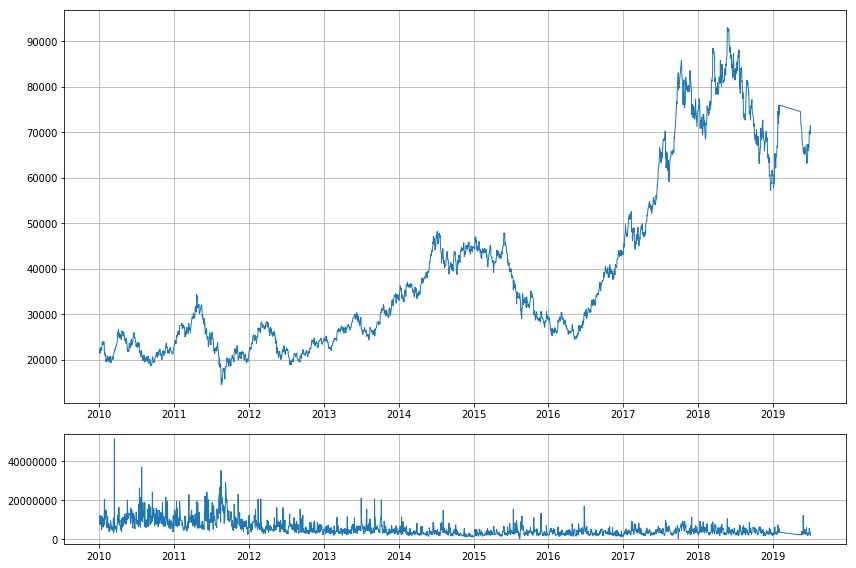

In [230]:
# 상단에는 수정 종가 그래프를, 하단에는 거래량 그래프 그리기
# 상단의 그래프가 하단의 그래프보다 더 큰 공간을 차지하고 있는 모양으로 만들기
# 이번에는 AxesSubplot 객체를 만들 때 add_subplot이 아닌 subplot2grid함수를 사용했다.


import matplotlib.pyplot as plt
import pandas_datareader.data as web

sk_hynix = web.DataReader("000660.KS", "yahoo")

fig = plt.figure(figsize = (12,8))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(sk_hynix.index, sk_hynix['Adj Close'], label = "Adjusted Close")
bottom_axes.plot(sk_hynix.index, sk_hynix['Volume'])

plt.tight_layout()
plt.show()

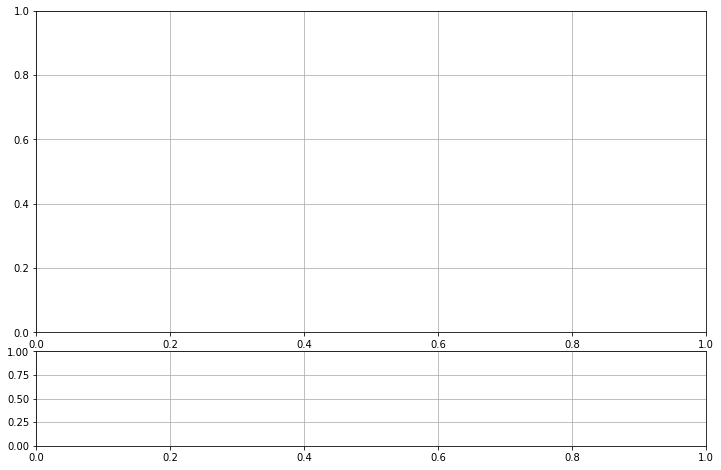

In [233]:
fig = plt.figure(figsize = (12,8))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)


# 첫 번째 인자인 (4,4)는 4 x 4 grid 모양을 의미한다.
# 두 번째 인자인 (0,0)은 4 x 4 grid에서 (0,0)에 위치하는 grid를 의미한다.
# 세 번째 인자인 rowspan = 3 은 (0,0)grid가 행 방향으로 3개만큼 걸친다는 것을 의미한다.
# 네 번째 인자인 colspan = 4 는 (0,0)grid가 열 방향으로 4개만큼 걸친다는 것을 의미한다.
# 4 x 4 grid
#     0  1  2  3
#  0 ㅁ ㅁ ㅁ ㅁ
#  1 ㅁ ㅁ ㅁ ㅁ
#  2 ㅁ ㅁ ㅁ ㅁ
#  3 ㅁ ㅁ ㅁ ㅁ

In [ ]:
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 이때 거래량 그래프가 출력되는 bottom_axes라는 AxesSubplot 객체에는 이 설정을 해주며
# 이는 거래량 값으로서 큰 값이 발생할 때 그 값을 오일러 상수(e)의 지수 형태로 표현되지 않게 해준다.

In [229]:
# tight_layout 함수는 subplot들이 Figure 객체의 영역 내에서 자동으로 최대 크기로 출력되게 해준다.
# 여백을 두는 것보다 조금 더 그래프를 크게 그리는 편이 해석할 때 편리하기 때문에 자동으로 크기 조절을 해줌

plt.tight_layout()

<Figure size 576x504 with 0 Axes>

## 캔들 스틱 차트 그리기

In [234]:
#  고가 ---------->         ㅣ
#                          ㅣ
#  종가 ---------->     __ㅣ__
#                     ㅣ    ㅣ
#                    ㅣ    ㅣ
#                   ㅣ    ㅣ
#  시가 ----------> ------
#                    ㅣ
#                   ㅣ
#                  ㅣ
#  저가 ------->  ㅣ

# 봉 차트를 구성하는 기본 단위인 '일봉'은 거래일 동안의 시가, 고가, 저가, 종가의 네 가지 값을 한 개의 봉으로 표현
# 일봉 중 종가가 시가보다 높은 경우를 양봉이라하며 빨간색으로 표시하고
# 일봉 중 종가가 시가보다 낮은 경우를 음봉이라하며 파란색으로 표시한다.
# 봉 차트에서는 시가와 종가 사이를 몸통이라 부르고 몸통 윗부분을 머리, 몸통 아래를 꼬리라고 부른다.

import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016, 3, 1)
end = datetime.datetime(2016, 3, 31)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)

In [235]:
skhynix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-02,31300.0,30650.0,31050.0,30950.0,3567312.0,29378.457031
2016-03-03,32000.0,31100.0,31550.0,31950.0,3898363.0,30327.679688
2016-03-04,32100.0,31550.0,31800.0,31900.0,1913316.0,30280.218750
2016-03-07,32250.0,31500.0,32150.0,31900.0,3487206.0,30280.218750
2016-03-08,31500.0,30300.0,31200.0,30500.0,4616147.0,28951.304688


In [236]:
# 봉 차트는 mpl_finance 모듈의 candlestick2_ohlc 함수를 이용한다.

In [247]:
import matplotlib.pyplot as plt

In [248]:
import mpl_finance

ModuleNotFoundError: No module named 'matplotlib.finance'

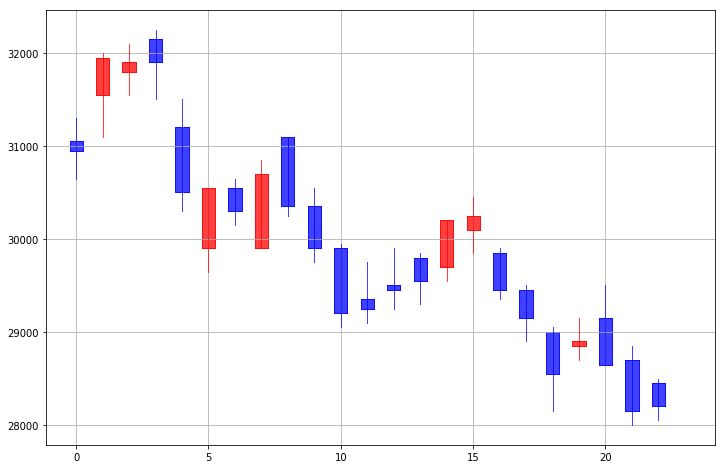

In [249]:
fig = plt.figure(figsize = (12,8))

ax = fig.add_subplot(111)

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'],
                                 skhynix['High'],
                                 skhynix['Low'],
                                 skhynix['Close'], width = 0.5, colorup = 'r', colordown = 'b')

plt.show()

In [ ]:
# 위 그래프에서 3월 1일은 실제로는 시장이 열러지 않았떤 날이기 때문에 데이터에서 미리 제거했어야하며
# 봉 차트 그래프의 x 축에 날짜가 아니라 0부터 시작하는 정수값이 출력되어 각 봉에 해당하는 거래일 정보를 얻을 수 없다.

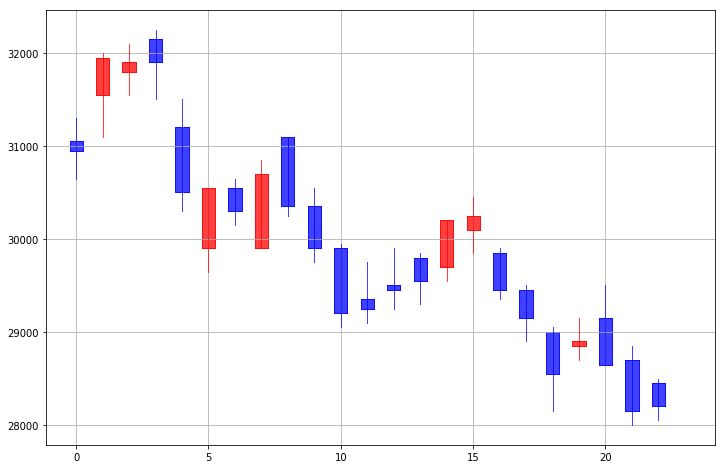

In [250]:
# 3월 1일 값 제거

import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance

start = datetime.datetime(2016,3,1)
end = datetime.datetime(2016,3,31)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)
skhynix = skhynix[skhynix['Volume']>0]

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'],skhynix['High'],skhynix['Low'],skhynix['Close'],width=0.5,colorup='r',colordown='b')
plt.show()

In [253]:
# index가 아닌 날짜 지정

skhynix.index

DatetimeIndex(['2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07',
               '2016-03-08', '2016-03-09', '2016-03-10', '2016-03-11',
               '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17',
               '2016-03-18', '2016-03-21', '2016-03-22', '2016-03-23',
               '2016-03-24', '2016-03-25', '2016-03-28', '2016-03-29',
               '2016-03-30', '2016-03-31', '2016-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [254]:
skhynix.index[0].strftime('%Y-%m-%d')

'2016-03-02'

In [256]:
name_list = []
for day in skhynix.index:
    name_list.append(day.strftime('%d'))
    
name_list

['02',
 '03',
 '04',
 '07',
 '08',
 '09',
 '10',
 '11',
 '14',
 '15',
 '16',
 '17',
 '18',
 '21',
 '22',
 '23',
 '24',
 '25',
 '28',
 '29',
 '30',
 '31',
 '01']

In [257]:
day_list = range(len(skhynix))

In [258]:
day_list

range(0, 23)

In [260]:
# set_major_locator나 set_major_formatter 함수에 인자를 전달할 때,  
# ticker.FixedLocator와 ticker.FixedFomatter를 사용한다.
# 각각 고정 위치와 고정된 포메팅이라는 것을 의미한다.

import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

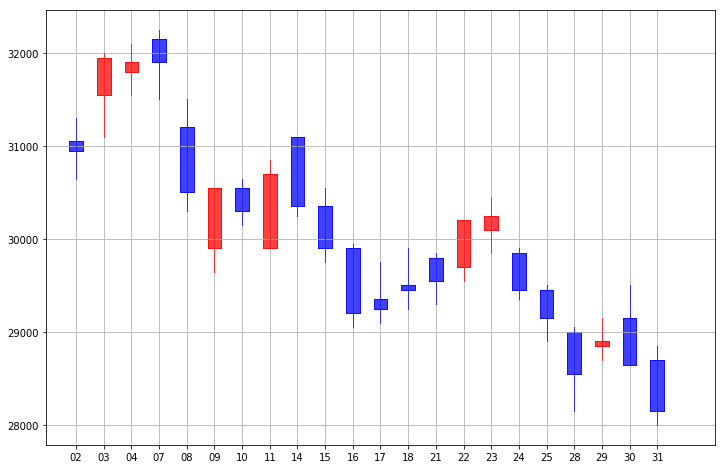

In [265]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.ticker as ticker

start = datetime.datetime(2016,3,1)
end = datetime.datetime(2016,3,30)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)
skhynix = skhynix[skhynix['Volume']>0]

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

day_list = range(len(skhynix))
name_list = []
for day in skhynix.index:
    name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'],skhynix['High'],skhynix['Low'],skhynix['Close'],width=0.5,colorup='r',colordown='b')
plt.show()

In [271]:
# 매주 월요일에만 '연도-월-일'포맷으로 출력해 보자

day_list = []
name_list = []

for i, day in enumerate(skhynix.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')
        
print(day_list)
print(name_list)

[3, 8, 13, 18]
['2016-03-07(Mon)', '2016-03-14(Mon)', '2016-03-21(Mon)', '2016-03-28(Mon)']


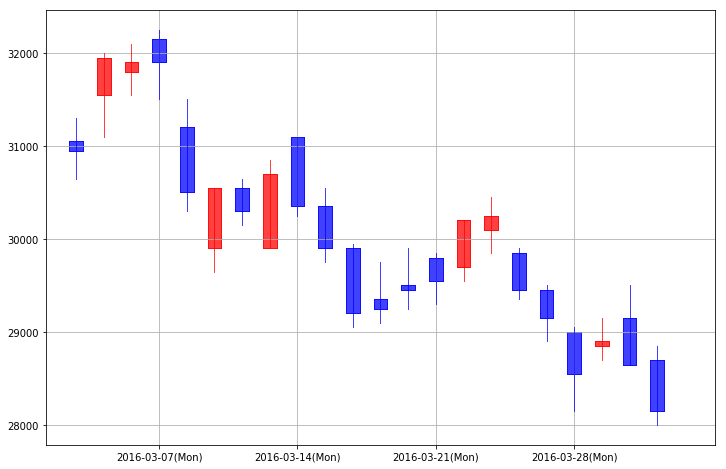

In [272]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.ticker as ticker

start = datetime.datetime(2016,3,1)
end = datetime.datetime(2016,3,30)
skhynix = web.DataReader("000660.KS", "yahoo", start, end)
skhynix = skhynix[skhynix['Volume']>0]

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

day_list = []
name_list = []

for i, day in enumerate(skhynix.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, skhynix['Open'],skhynix['High'],skhynix['Low'],skhynix['Close'],width=0.5,colorup='r',colordown='b')
plt.show()

## bar 차트 그리기

In [274]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

# font_manager와 rc 모듈은 그래프를 그릴 때 한글 폰트를 설정하는데 사용된다.

In [275]:
# 업종명 한글로 출력
# matplotlib는 한글 폰트를 설정하지 않으면 기본적으로 한글이 제대로 출력되지 않는다.
# 따라서 다음과 같이 사용할 한글 폰트를 설정해야한다.

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 윈도우 7부터는 '맑은 고딕' 폰트가 기본 폰트로 사용되고 있기 때문에 이번에 "c:/Windows/Fonts/malgun.ttf" 경로를 사용했다.
# 폰트의 설치 경로로부터 폰트 이름을 먼저 알아낸 후 rc함수를 통해 폰트를 설정했다.

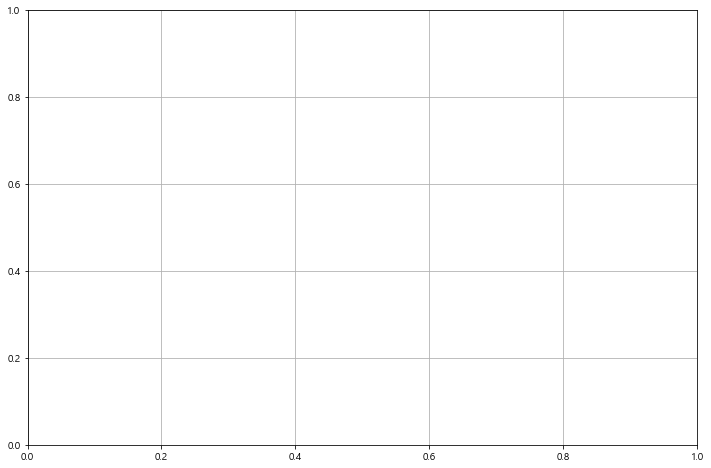

In [276]:
# 폰트를 알고 나면 수직 or 수평방향으로 bar차트를 그린다.
# 일단 bar 차트의 방향과는 상관 없이 한쪽 축에 표시될 label 값과 각 label에 해당하는 수치가 필요

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

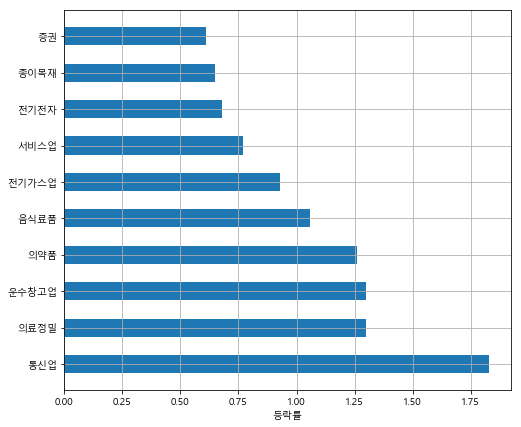

In [281]:
# 수평방향의 bar차트는 matplotlib.pyplot 모듈의 barh 함수를 사용해 그릴 수 있다.
# barh의 첫 번째 인자는 각 bar가 그려질 위치이고, 두 번째 인자는 각 bar에 대한 수치이다.
# 이 값들은 파이썬 리스트 형태로 전달하면 된다.
# align은 bar차트에서 bar의 정렬 위치를 설정하고 height는 수평 bar차트의 높이를 설정한다.

ypos = np.arange(10)
rects = plt.barh(ypos, fluctuations, align = 'center', height=0.5)
plt.yticks(ypos, industry)

plt.xlabel('등락률')
plt.show()

In [282]:
# 그래프의 스타일을 변경하기 위해 style을 설정한다.
# 참고로 그래프의 style을 변경하는 코드는 그래프를 출력하기 전에 수행해야 한다.

from matplotlib import style

In [283]:
style.use('ggplot')

In [284]:
# bar 차트의 각 bar에 등락률 데이터를 출력하기 위해 text함수를 사용
# text함수의 첫 번째 인자는 text가 출력되는 x축 위치를 의미, 두 번째 인자는 text가 출력될 y축 위치를 의미
# 세 번째 인자는 표시될 값을 전달하면 된다. ha는 수평 방향으로의 정렬을 의미하고, va는 수직 방향으로의 정렬을 의미한다.

# 첫 번째 인자를 보면 rect.get_width를 사용하는데 rect는 bar차트에서 각 bar에 해당한다.
# 즉, 각 bar의 너비를 알아낸 후 그 너비의 95% 지점이 텍스트가 출력될 x축 위치가 된다.
# 두 번째 인자로는 rect.get_y를 통해 얻은 후 bar 높이의 절반을 더함으로써 y축 위치를 계산한다.

for i, rect in enumerate(rects):
    ax.text(0.95*rect.get_width(), rect.get_y() + rect.get_height()/2.0, str(fluctuations[i]) + '%', ha='right', va = 'center')

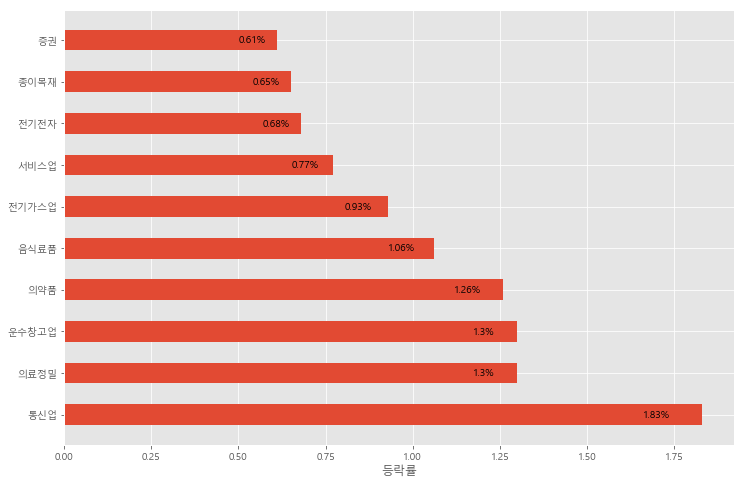

In [285]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

ypos = np.arange(10)
rects = plt.barh(ypos, fluctuations, align = 'center', height=0.5)
plt.yticks(ypos, industry)

for i, rect in enumerate(rects):
    ax.text(0.95*rect.get_width(), rect.get_y() + rect.get_height()/2.0, str(fluctuations[i]) + '%', ha='right', va = 'center')

plt.xlabel('등락률')
plt.show()

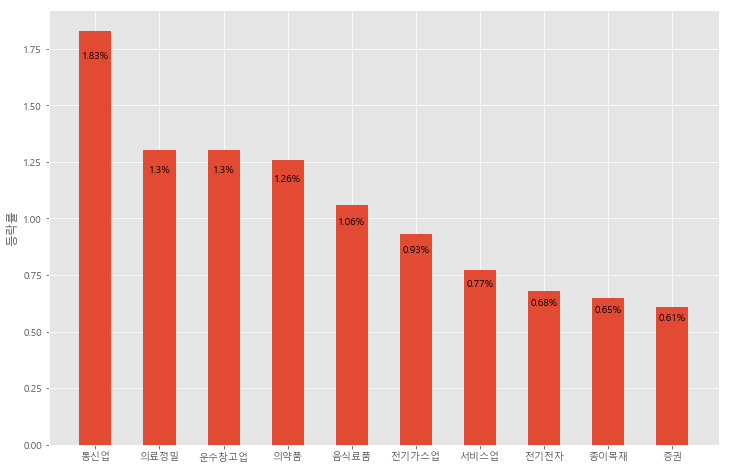

In [291]:
# 수직 방향의 bar 차트는 matplotlib.pyplot 모듈의 bar함수를 사용하면 된다.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

pos = np.arange(10)
rects = plt.bar(pos, fluctuations, align='center', width=0.5)
plt.xticks(pos, industry)


for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95*rect.get_height(), str(fluctuations[i]) + '%', ha='center', va='top')
    
plt.ylabel('등락률')
plt.show()

## pie 차트 그리기

In [292]:
# 먼저 사용할 모듈

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style


# 참고로 'ggplot'은 스타일의 한 종류일 뿐이고 matplotlib은 'ggplot'외에도 여러가지 스타일을 제공한다.


font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [293]:
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]

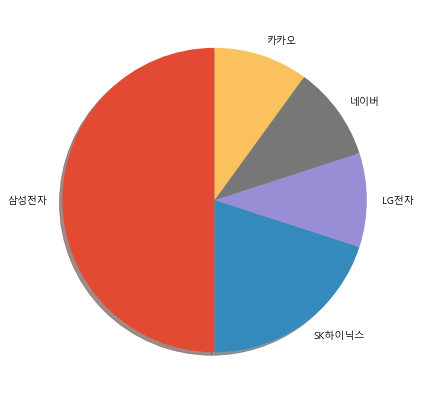

In [294]:
# pie 함수는 matplotlib.pyplot 모듈의 pie함수를 사용해 그릴 수 있다.
# pie 함수의 첫 번째 인자는 각 범주가 데이터에서 차지하는 비율이며 pie 차트에서 가장 중요한 데이터가 이 값이다.
# labels를 통해 범주를 전달 할 수 있으며, 'shadow=True'를 통해 pie 차트에 그림자를 설정할 수 있다.
# 'startangle'은 첫 번째 pie 시작 각도를 의미한다.

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

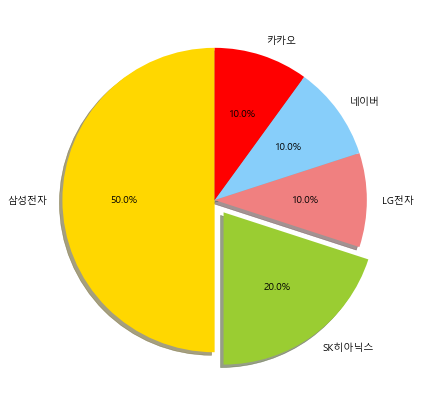

In [296]:
# 각 범주에 해당하는 색상을 리스트 형태로 전달하면 차트 색상을 설정할 수 있다.
# 그리고 특정 pie를 확대하려면 각 범주에 확대 값을 리스트 형태로 전달하면 된다.

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK히아닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]
explode = (0.0, 0.1, 0.0, 0.0, 0.0)

# 확대를 위해 explode 인자에 확대 값을 전달했고, 색상 변경을 위해 colors 인자에 색상 값 리스트를 전달했다.
# 마지막으로 각 범주가 데이터에서 차지하는 비율을 출력하기 위해 autopct 인자를 사용했다.

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()